# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import sys
print(sys.executable)

/Users/tomwildun/anaconda3/envs/testmojave/bin/python


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | novaya usman'
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | ciudad acuna
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | la'ie
Processing Record 16 of Set 1 | dingli
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | mount

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,29.98,89,100,3.58,EC,1701462678
1,invercargill,-46.4000,168.3500,13.37,60,100,0.99,NZ,1701462871
2,dudinka,69.4058,86.1778,-21.88,87,100,5.34,RU,1701462871
3,edinburgh of the seven seas,-37.0676,-12.3116,13.53,74,100,7.48,SH,1701462872
4,novaya usman',51.6418,39.4086,1.14,89,100,5.65,RU,1701462872


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,89,100,3.58,EC,1701462678
1,invercargill,-46.4000,168.3500,13.37,60,100,0.99,NZ,1701462871
2,dudinka,69.4058,86.1778,-21.88,87,100,5.34,RU,1701462871
3,edinburgh of the seven seas,-37.0676,-12.3116,13.53,74,100,7.48,SH,1701462872
4,novaya usman',51.6418,39.4086,1.14,89,100,5.65,RU,1701462872


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

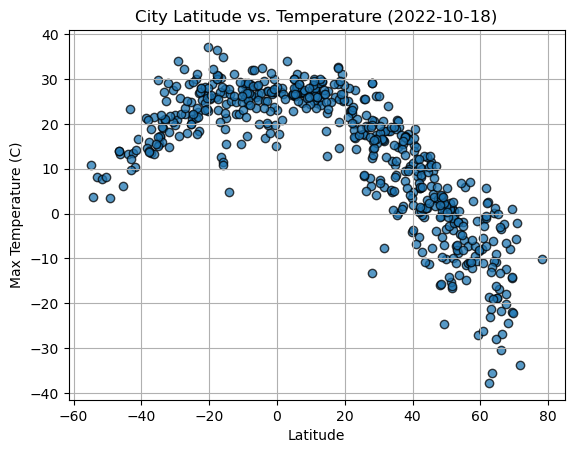

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

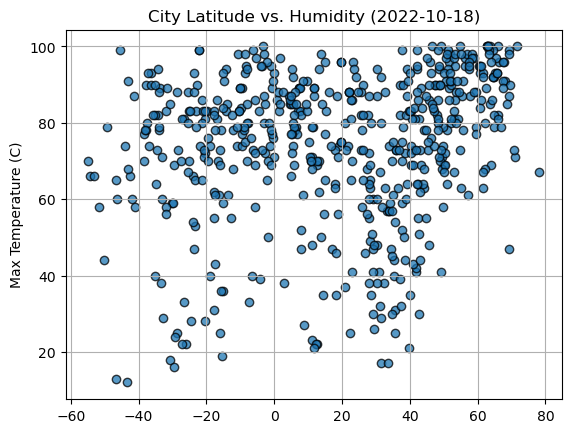

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
# plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

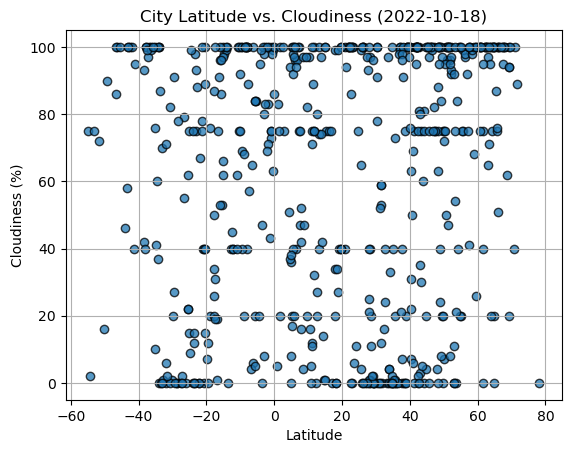

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", alpha=0.75, edgecolors="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

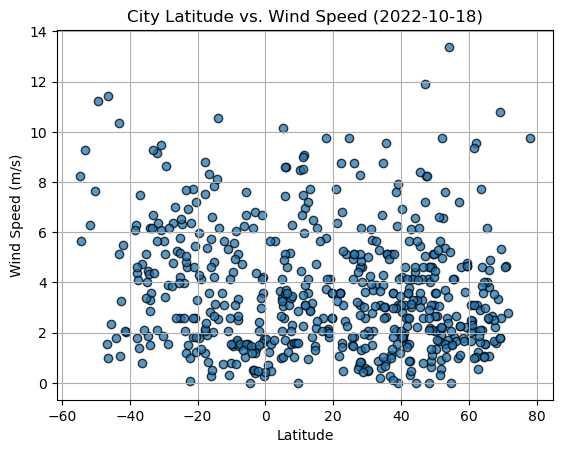

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", alpha=0.75, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots (activity 7 day 2)
def linear_regression(x_series, y_series, y_label, xy):    
#Create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f'Latitude vs. {y_label}')
    
# Calculate linear regression using Scipy
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot linear regression line and r-squared
    plt.plot(x_series, regression_values, "r-")
    plt.annotate(line_eq, xy, fontsize=15, color="red")
    print(f"The r-squared value is: {rvalue**2}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,dudinka,69.4058,86.1778,-21.88,87,100,5.34,RU,1701462871
4,novaya usman',51.6418,39.4086,1.14,89,100,5.65,RU,1701462872
5,bilibino,68.0546,166.4372,-24.49,91,100,1.60,RU,1701462872
6,albany,42.6001,-73.9662,8.23,81,100,0.89,US,1701462873
9,nemuro,43.3236,145.5750,-0.80,69,30,4.14,JP,1701462874


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,89,100,3.58,EC,1701462678
1,invercargill,-46.4000,168.3500,13.37,60,100,0.99,NZ,1701462871
3,edinburgh of the seven seas,-37.0676,-12.3116,13.53,74,100,7.48,SH,1701462872
7,port lincoln,-34.7333,135.8667,15.57,64,41,4.46,AU,1701462873
8,grytviken,-54.2811,-36.5092,3.75,66,2,5.65,GS,1701462873


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7732046307269917


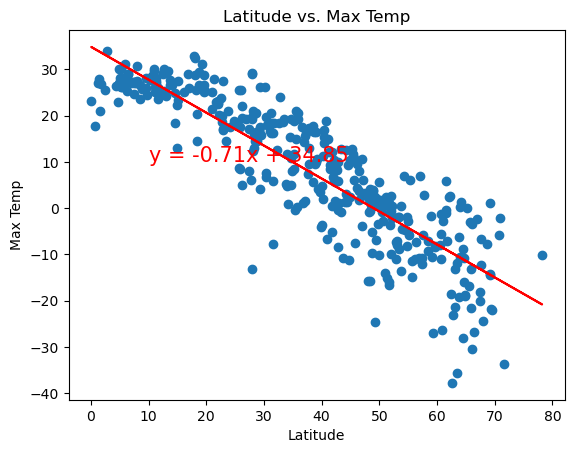

In [29]:
# Linear regression on Northern Hemisphere
y_label = "Max Temp"
annot_loc = [10, 10]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

The r-squared value is: 0.3371101121454875


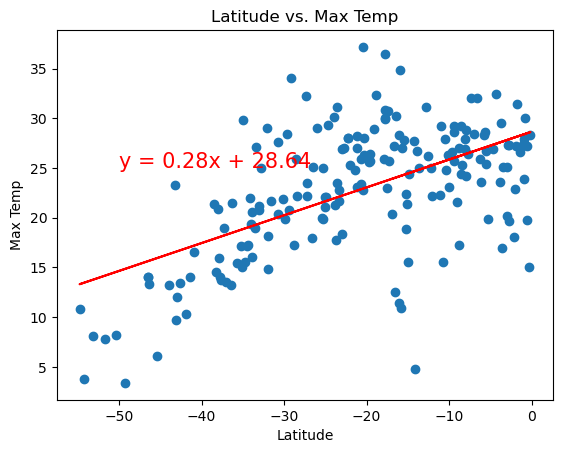

In [30]:
# Linear regression on Southern Hemisphere
y_label = "Max Temp"
annot_loc = [-50, 25]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

**Discussion about the linear relationship:


Northern Hemisphere df had an r-squared value of 0.77. This indicates that ~77% of the variation in maximum temp can be explained by latitude in northern hemisphere.

Southern hemisphere df had an r-squared value of 0.33. With this r squared value we can say say that this is a weak fit because 33% of the data can be explained.

We can infer that there is a strong relationship between distance from the equator and temperature 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.07804941614968709


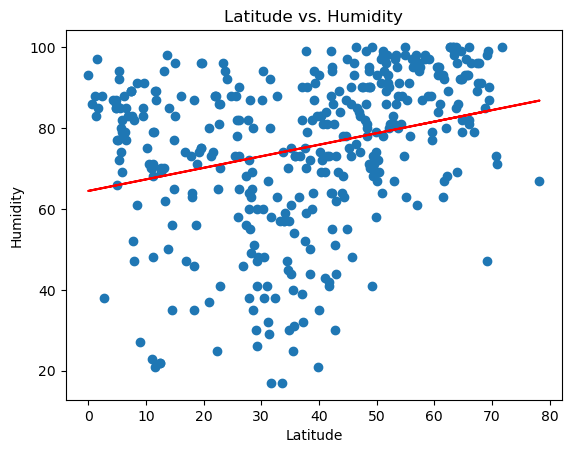

In [31]:
# Northern Hemisphere
y_label = "Humidity"
annot_loc = [10, 10]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

The r-squared value is: 0.04323860303987765


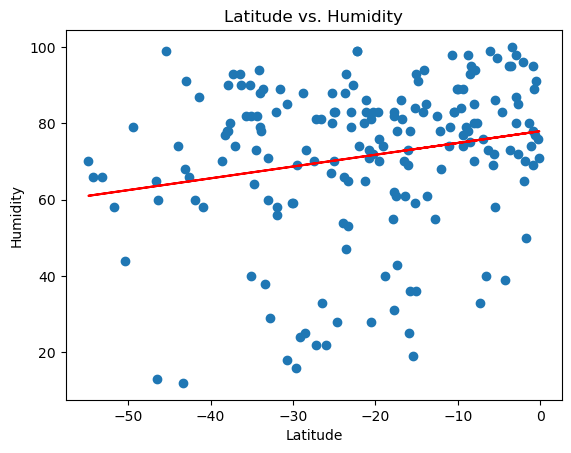

In [32]:
# Southern Hemisphere
y_label = "Humidity"
annot_loc = [10, 10]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

**Discussion about the linear relationship: for both the northern and southern hemisphere the r-squared value is quite low, 7% and 4% respectively. We can infer that there is not a strong correlation between himidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.04033663622250712


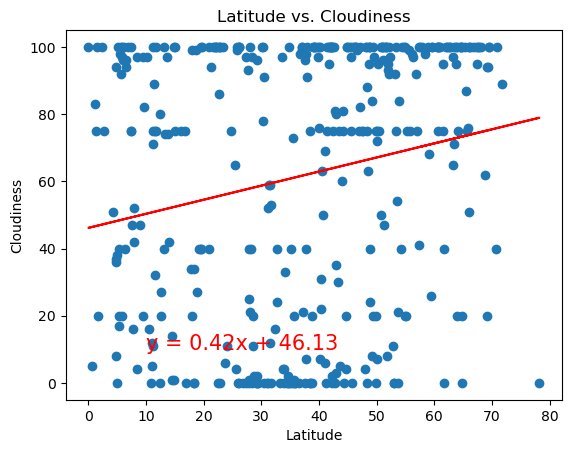

In [34]:
# Northern Hemisphere
y_label = "Cloudiness"
annot_loc = [10, 10]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

The r-squared value is: 0.008232067473217693


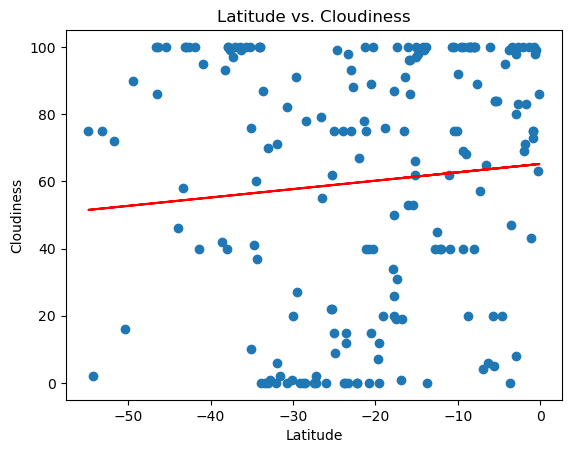

In [35]:
# Southern Hemisphere
y_label = "Cloudiness"
annot_loc = [10, 10]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

**Discussion about the linear relationship:** For the northern hemisphere 4% of the data can be explained by the model which is relatively low, meaning there is little to no correlation.
For the southern hemisphere lass than 1% of the data can be explained by the model so there is no correlation between latitude and cloudiness in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.003957703539379933


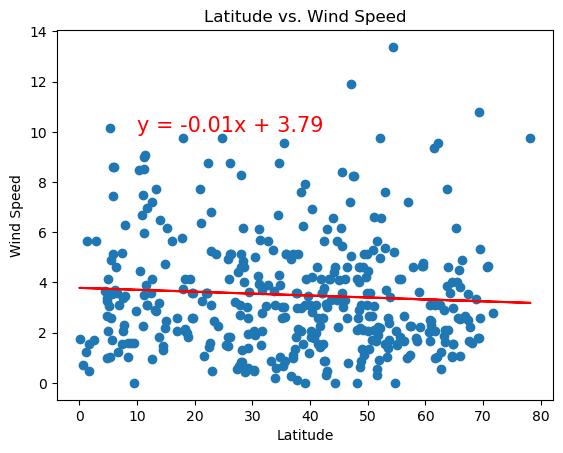

In [36]:
# Northern Hemisphere
y_label = "Wind Speed"
annot_loc = [10, 10]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

The r-squared value is: 0.11325839362802129


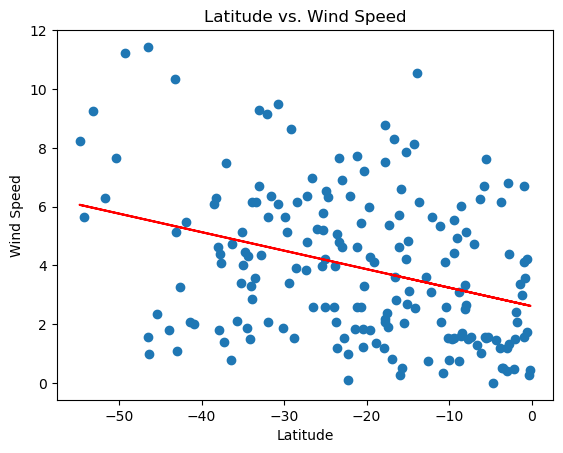

In [37]:
# Southern Hemisphere
y_label = "Wind Speed"
annot_loc = [10, 10]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df[y_label]

linear_regression(x_values, y_values, y_label, annot_loc)

**Discussion about the linear relationship:Northern hemisphere had an r-squared value of 0.003 meaning there is no correlation between wind speed and latitude within the northern hemisphere. Southern hemisphere had a higher r-squared value of 0.11 which can indicate a slight correlation however more data would be needed to determine a strong correlation. From these results we can infer that there is no significant correlation between latitude and wind speed.